In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score

In [2]:
#loading the data
#orginal full dataset
fulldata=pd.read_csv('https://raw.githubusercontent.com/anjalysam/Bank-Marketing-Analysis/master/bank-full.csv')

In [3]:
fulldata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


This is the original dataset containing 45211 rowa and 17 columns.

In [4]:
#loading train dataset
train=pd.read_csv('https://raw.githubusercontent.com/sinhabishal77/Predicting-whether-the-customer-will-subscribe-to-Term-Deposits/main/train.csv')

In [5]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


This is the divided dataset.
train dataset containing 31647 rows and 18 columns.

In [6]:
test=pd.read_csv('https://raw.githubusercontent.com/sinhabishal77/Predicting-whether-the-customer-will-subscribe-to-Term-Deposits/main/test.csv')

In [7]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


This is the test dataset containing 13564 rows and 17 columns.

In [8]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

this are the names of columns in the train dataset.

In [9]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

this are the names of columns present in the test dataset.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


This gives the glimps of train dataset,dtype ,null values, columns.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


This gives the glimps of train dataset,dtype ,null values, columns.

In [12]:
#total count of rows and columns
train.shape

(31647, 18)

In [13]:
#total count of rows and columns 
test.shape

(13564, 17)

In [14]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


Firt five rows and columns.

In [15]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


first five rows and columns.

In [16]:
#checking for null values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

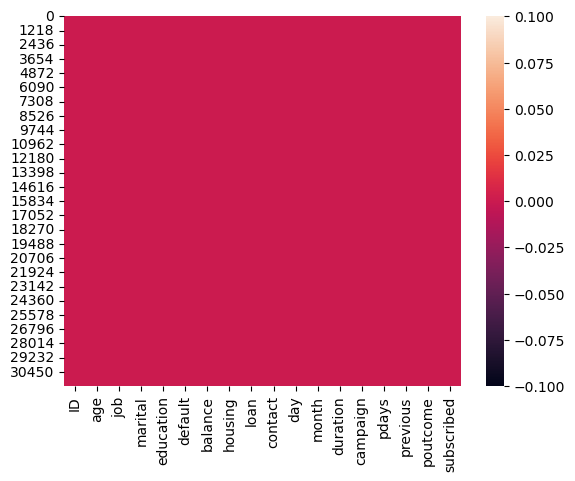

In [17]:
sns.heatmap(train.isnull())

visualization of null values with heatmap.
There is no null values.

In [18]:
#checking for null values
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no null values.
we can see this through heatmap.

<Axes: >

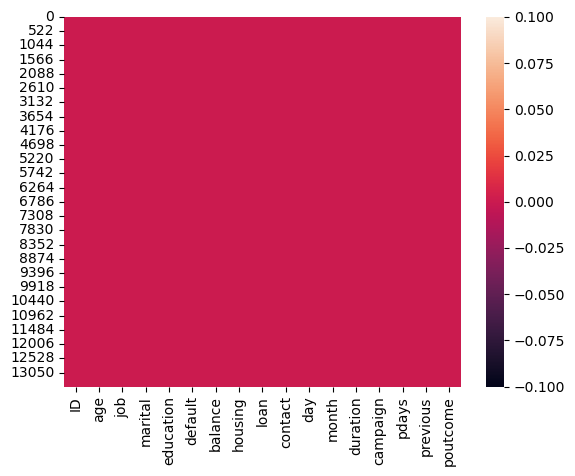

In [19]:
sns.heatmap(test.isnull())

In [20]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

value count of subscribed colum.
Total yes rows are 3715 and no rows are 27932.

<Axes: >

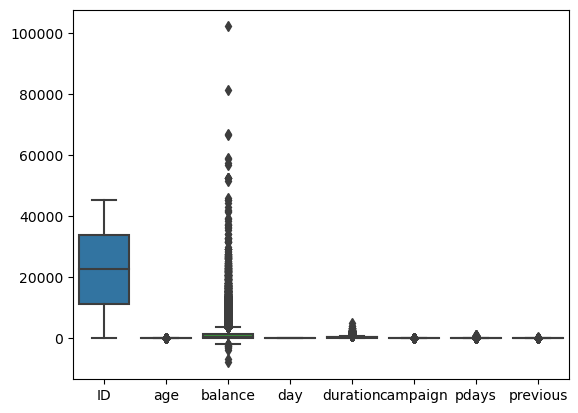

In [21]:
#dropping of duplicates values
train.drop_duplicates(inplace=True)
sns.boxplot(train)

In [22]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#This shows the statistical information of the numericalcolumns. It has no negative values from the above abservation we can say that-

The count of all columns are same as there is no missing values.
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right.
There is huge difference between the max and 75% so there are outliers present in the data.
The standard deviation,25% percentile value and min can be notice by this describe method.

<Axes: xlabel='subscribed', ylabel='count'>

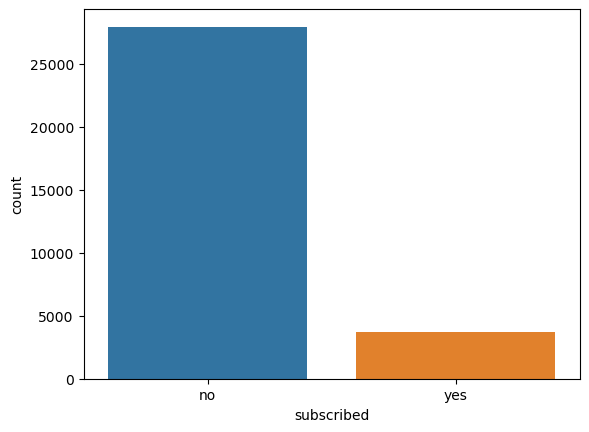

In [23]:
sns.countplot(data=train,x='subscribed')

This is the visualization of yes and no sbuscribed customer.
no subscribe is almost 80% high than yes.

In [24]:
train['job'].value_counts(normalize=True)

blue-collar      0.216197
management       0.209783
technician       0.167694
admin.           0.114734
services         0.091731
retired          0.049736
self-employed    0.035485
entrepreneur     0.031851
unemployed       0.028597
housemaid        0.027617
student          0.020065
unknown          0.006509
Name: job, dtype: float64

the value count of job columns.

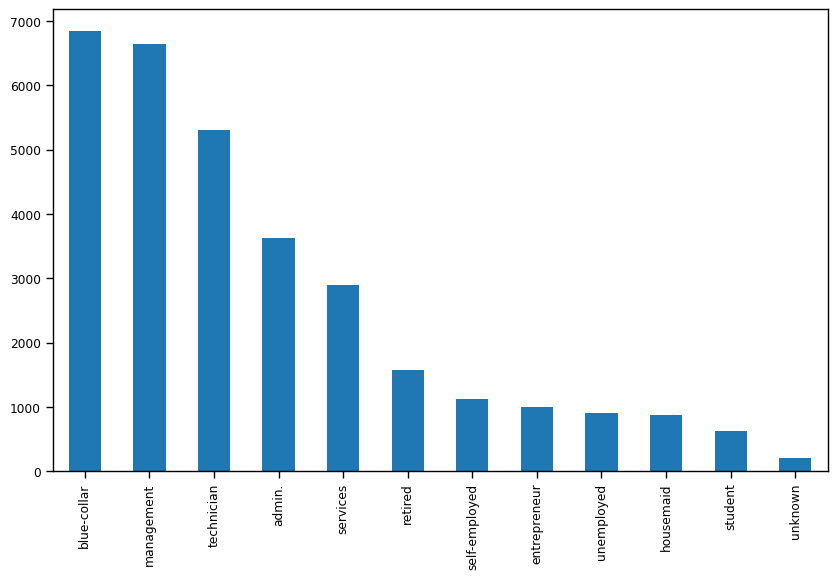

In [25]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients belonge to blue-collar job and students are least, as they don't make term deposits in general.

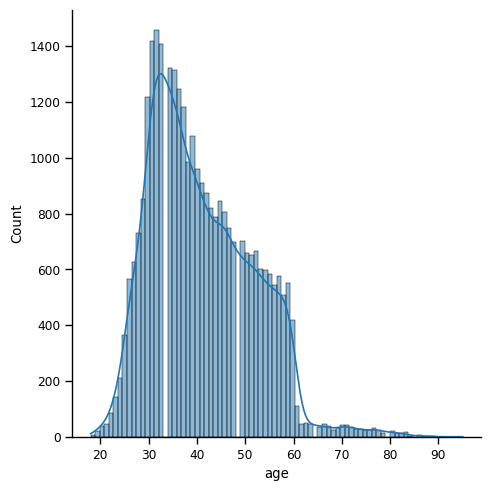

In [26]:
sns.displot(train['age'],kde=True)

We can notice that most of the clients fall in the age group between 30 to 45.

In [27]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


This shows the most subscribed and non subscribed people belonging to which category of job.
people working in managment are the highest subscribed and the non subscribed are from blue collar.
This can be visualized through bargraph.
Students subscribed and non subscribed both are less in compare to other as total count of student is less.

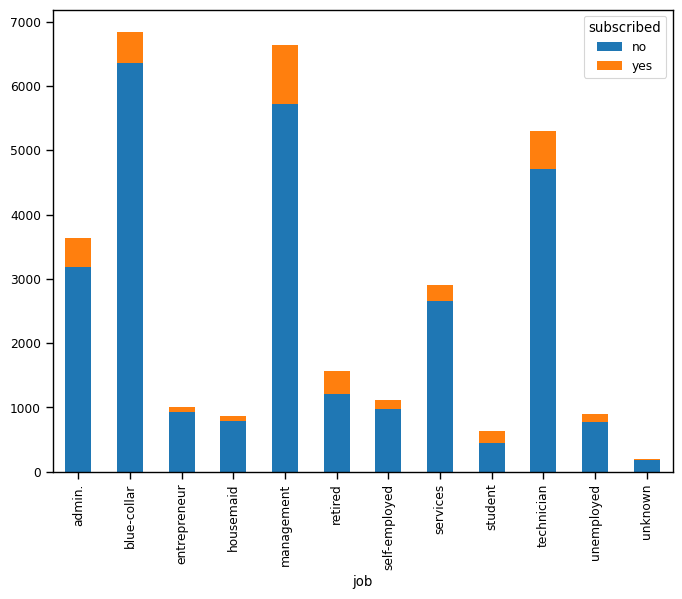

In [28]:
train=pd.crosstab(train['job'],train['subscribed'])
train.plot.bar(stacked=True,figsize=(8,6));

This is the visualization of job columns in comparison to the subscribed and not subscribed category.
the blue colour is for people belonging to the different job who has not subscribed and orange colour is for subscribed.
As we can see blue collar job has most not subscribed and management job are most subscribed ones.

In [29]:
#converting categorical data into numerical data
train=pd.read_csv('https://raw.githubusercontent.com/sinhabishal77/Predicting-whether-the-customer-will-subscribe-to-Term-Deposits/main/train.csv') 
enc=OrdinalEncoder()
train[['job','marital','education','default','housing','loan','month','contact','poutcome','subscribed']]=enc.fit_transform(train[['job','marital','education','default','housing','loan','month','contact','poutcome','subscribed']])

In [30]:
train.corr()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


correlation between dependent and independent variables.

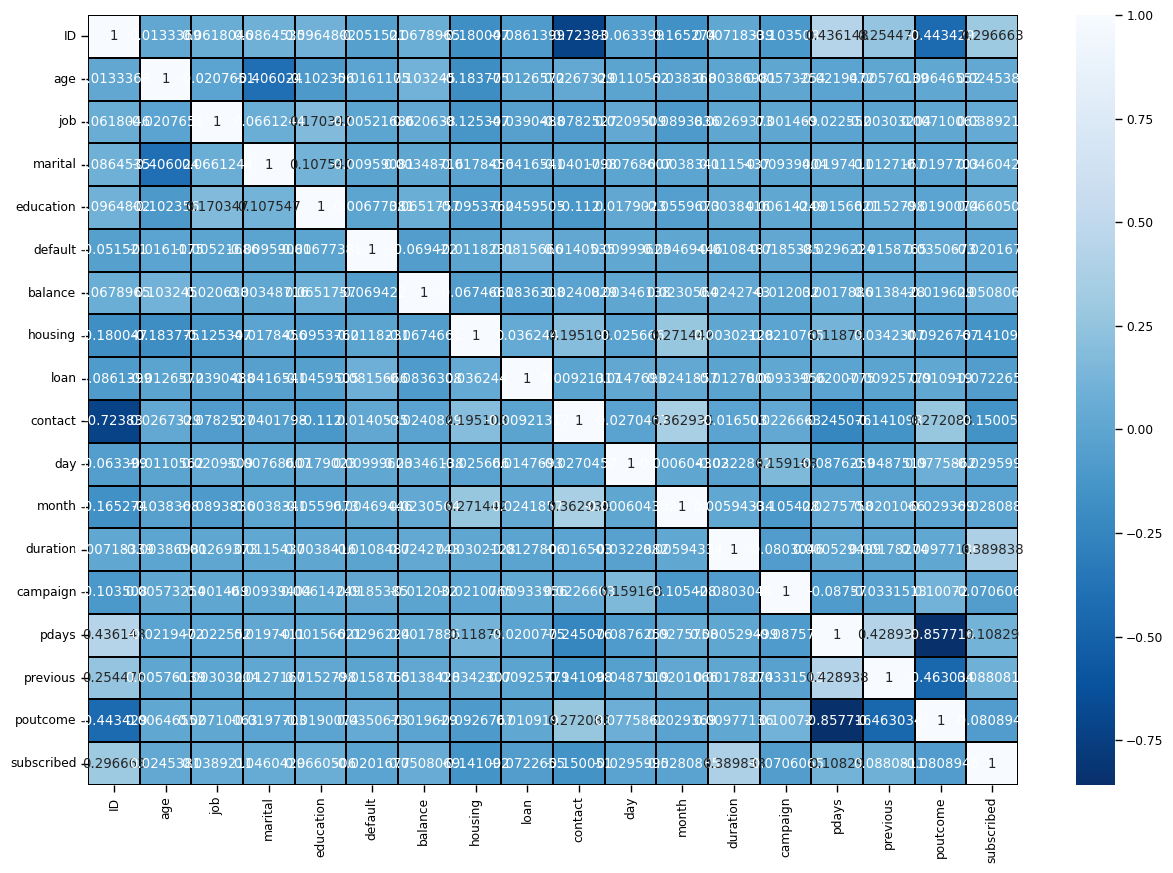

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

We can see that duration of the call is highly correlated with the target variable.
poutcome is negatively correlate with pdays.

In [32]:
# dropping the columns
train.drop(['day'],axis=1,inplace=True)
train.drop(['contact'],axis=1,inplace=True)
train.drop(['month'],axis=1,inplace=True)

ID               Axes(0.125,0.786098;0.227941x0.0939024)
age           Axes(0.398529,0.786098;0.227941x0.0939024)
job           Axes(0.672059,0.786098;0.227941x0.0939024)
marital          Axes(0.125,0.673415;0.227941x0.0939024)
education     Axes(0.398529,0.673415;0.227941x0.0939024)
default       Axes(0.672059,0.673415;0.227941x0.0939024)
balance          Axes(0.125,0.560732;0.227941x0.0939024)
housing       Axes(0.398529,0.560732;0.227941x0.0939024)
loan          Axes(0.672059,0.560732;0.227941x0.0939024)
duration         Axes(0.125,0.448049;0.227941x0.0939024)
campaign      Axes(0.398529,0.448049;0.227941x0.0939024)
pdays         Axes(0.672059,0.448049;0.227941x0.0939024)
previous         Axes(0.125,0.335366;0.227941x0.0939024)
poutcome      Axes(0.398529,0.335366;0.227941x0.0939024)
subscribed    Axes(0.672059,0.335366;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

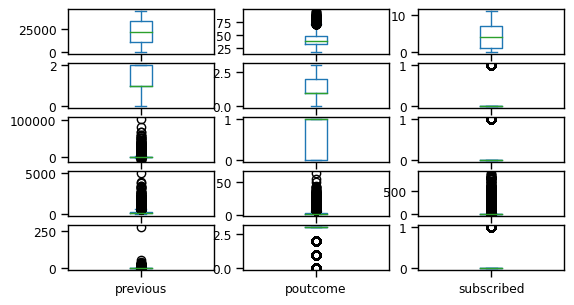

In [33]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
train.plot(kind='box',subplots=True,layout=(7,3))  

We can see the presence of outliers.

In [34]:
#checking skewness
train.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [35]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [36]:
#removing skewness
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [37]:
x.skew()

ID           0.005851
age          0.113940
job          0.264817
marital     -0.100071
education    0.199441
default      7.149903
balance           NaN
housing     -0.223918
loan         1.833474
duration    -0.438600
campaign     1.337184
pdays             NaN
previous     2.537808
poutcome    -1.996421
dtype: float64

In [38]:
x['previous']=np.cbrt(x['previous'])
x['default']=np.cbrt(x['default'])

# Model Building

In [39]:
#seperating independent and target variables
x=train.drop('subscribed',axis=1)
y=train['subscribed']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (31647, 14)
label dimension (31647,)


In [40]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.27119157,  1.41579295, -1.324317  , ..., -0.40855484,
        -0.23705869,  0.44177692],
       [ 1.377516  , -0.93715562,  2.03772948, ..., -0.40855484,
        -0.23705869,  0.44177692],
       [-0.55400134, -1.31362739,  0.81516712, ..., -0.40855484,
        -0.23705869,  0.44177692],
       ...,
       [-0.21826484, -0.84303767, -0.10175464, ..., -0.40855484,
        -0.23705869,  0.44177692],
       [ 1.22303132,  1.5099109 ,  1.4264483 , ...,  2.99472279,
         4.71652095, -2.61304774],
       [-0.64302122,  1.32167501, -0.10175464, ..., -0.40855484,
        -0.23705869,  0.44177692]])

In [42]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.9066877303844129 at random state 154


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [44]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8847814639283833
[[7864  573]
 [ 521  537]]
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      8437
         1.0       0.48      0.51      0.50      1058

    accuracy                           0.88      9495
   macro avg       0.71      0.72      0.72      9495
weighted avg       0.89      0.88      0.89      9495



the accuracy score of Decision tree is 88.47%

In [45]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.9151132174828858
[[8178  259]
 [ 547  511]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      8437
         1.0       0.66      0.48      0.56      1058

    accuracy                           0.92      9495
   macro avg       0.80      0.73      0.76      9495
weighted avg       0.91      0.92      0.91      9495



Accuracy score of random forest is 91.51%

In [46]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.9066877303844129
[[8255  182]
 [ 704  354]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      8437
         1.0       0.66      0.33      0.44      1058

    accuracy                           0.91      9495
   macro avg       0.79      0.66      0.70      9495
weighted avg       0.89      0.91      0.89      9495



Accuracy score of logistic regression is 90.66%

In [47]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.9096366508688783
[[8198  239]
 [ 619  439]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      8437
         1.0       0.65      0.41      0.51      1058

    accuracy                           0.91      9495
   macro avg       0.79      0.69      0.73      9495
weighted avg       0.90      0.91      0.90      9495



accyracy score of adaboost is 90.96%

In [48]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.9087941021590311
[[8235  202]
 [ 664  394]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      8437
         1.0       0.66      0.37      0.48      1058

    accuracy                           0.91      9495
   macro avg       0.79      0.67      0.71      9495
weighted avg       0.90      0.91      0.90      9495



The accuracy score of Extratrees classifier is 90.87%

# checking the cross validation¶

In [49]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.88625592 0.88957346 0.888924   0.88228788 0.88118186]
0.8856446253947263
0.0033984620808180928
difference between accuracu score and cross validation -0.0008631614663430209


cross validation score of decisiontree is 0.8856446253947263

In [50]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.91011058 0.91011058 0.90630431 0.9108864  0.9055143 ]
0.9085852355452981
0.0022172944492314037
difference between accuracy score and corss validation 0.006527981937587635


cross validation score of randomforest is 0.9085852355452981

In [51]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.90110585 0.89778831 0.89698215 0.89935219 0.89793016]
0.8986317303158534
0.0014536154312492586
difference between accuracy score and corss validation 0.008056000068559444


cross validation score of logistic regression is 0.8986317303158534

In [52]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.90315956 0.90031596 0.89856217 0.90709433 0.90361827]
0.9025500560747851
0.0029345314458510056
difference between accuracy score and cross validation 0.006244046084246002


cross validation score of adaboost is 0.9025500560747851

In [53]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.90521327 0.90189573 0.90093222 0.90693632 0.90409227]
0.9038139640068025
0.0021803083420022136
difference between accuracy score and cross validation 0.004980138152228641


cross validation score of extratrees classifier is 0.9038139640068025

DecisionTree is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [54]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [55]:
para={'criterion':['gini','entropy'],
      'splitter':['best','random'],
     'max_depth':[None]}
dtc_cv=GridSearchCV(dtc,para,cv=10)
dtc_cv.fit(x_train,y_train)
print(dtc_cv.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}


In [56]:
#checking new parameters
dtc_new=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None)
dtc_new.fit(x_train,y_train)
y_pred_new=dtc_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.8865718799368089
89.594523433386


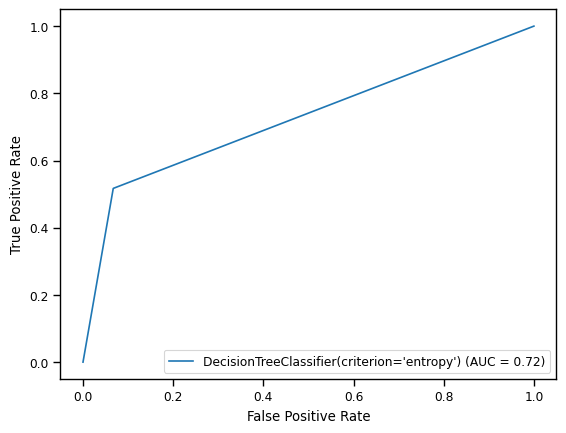

In [57]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=dtc_new)
display.plot()

Here we have plotted the ROC curve for the model and the Auc value of the best model is 72%

In [58]:
#Saving the model
import joblib
import pickle
filename="Bank_marketing.pkl"
pickle.dump(dtc_new,open(filename,'wb'))

In [59]:
#predicting the save model
model=pickle.load(open('Bank_marketing.pkl','rb'))

In [60]:
result=model.score(x_test,y_test)
print(result*100)

88.65718799368089


In [61]:
#checking model prediction
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,9485,9486,9487,9488,9489,9490,9491,9492,9493,9494
predicted,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
orginal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
enc=OrdinalEncoder()
test[['job','marital','education','default','housing','month','contact','loan','poutcome']]=enc.fit_transform(test[['job','marital','education','default','housing','month','contact','loan','poutcome']])

In [63]:
# dropping the columns
test.drop(['day'],axis=1,inplace=True)
test.drop(['contact'],axis=1,inplace=True)
test.drop(['month'],axis=1,inplace=True)

In [64]:
test_pred = dtc.predict(test)
test_pred

array([0., 0., 0., ..., 0., 0., 0.])